# Techniques for the Assignment 2/2

JD Sports and Frasers Group as used as exmaples in this session.

## Download the required data

You need to download the daily prices from 02/03/2020 to 28/02/2022. Then set the last 20 days as the test set and the first 485 days (for this example, yours may vary) as the training set.

In [146]:
# import required libraries or commands within a library

In [147]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [231]:
import pandas as pd
import yfinance as yf
import numpy as np

In [232]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [233]:
# Download JD Sports prices
LG=yf.download('LGEN.L',start='2020-03-02',end='2022-03-01')
Aviva=yf.download('AV.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [234]:
LG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,265.500000,267.238007,245.100006,254.500000,188.444519,33556784
2020-03-03,260.000000,267.399994,259.399994,265.100006,196.293289,29998255
2020-03-04,263.899994,270.299988,256.100006,261.500000,193.627655,31112240
2020-03-05,264.200012,266.000000,247.500000,248.000000,183.631592,29435589
2020-03-06,241.800003,245.319000,235.800003,241.399994,178.744614,33069114
...,...,...,...,...,...,...
2022-02-22,265.700012,282.700012,265.600006,281.000000,241.536133,19506744
2022-02-23,281.500000,286.600006,280.420990,282.100006,242.481659,11699418
2022-02-24,269.899994,277.100006,265.899994,265.899994,228.556793,25170462


In [235]:
Aviva

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,467.105194,477.500000,446.842102,451.578888,271.173859,24068446
2020-03-03,460.000000,467.500000,455.263092,455.263092,273.386230,17339616
2020-03-04,463.026306,468.947296,454.736786,460.657806,276.625763,10911805
2020-03-05,489.473602,566.320984,453.420990,462.631500,277.810944,19697870
2020-03-06,456.052612,458.684204,439.342102,451.315704,271.015778,16304615
...,...,...,...,...,...,...
2022-02-22,551.973572,572.105225,548.157776,567.500000,401.360657,9133888
2022-02-23,569.736816,576.943420,567.894714,570.131470,403.221771,7559029
2022-02-24,547.500000,560.526306,537.236816,537.236816,379.957214,14246342


In [236]:
FTSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6580.600098,6775.200195,6496.000000,6654.899902,6654.899902,1770844200
2020-03-03,6654.899902,6846.299805,6654.899902,6718.200195,6718.200195,1277190200
2020-03-04,6718.200195,6856.299805,6700.200195,6815.600098,6815.600098,1115783100
2020-03-05,6815.600098,6834.100098,6662.600098,6705.399902,6705.399902,1146893100
2020-03-06,6705.399902,6705.399902,6431.399902,6462.600098,6462.600098,1377953500
...,...,...,...,...,...,...
2022-02-22,7484.299805,7531.299805,7365.000000,7494.200195,7494.200195,1018787100
2022-02-23,7494.200195,7550.000000,7490.500000,7498.200195,7498.200195,862648700
2022-02-24,7498.200195,7498.200195,7204.700195,7207.000000,7207.000000,1966584700


In [237]:
#show the index of DataFrame
LG.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [238]:
#check is there any point of LG index different from Aviva index
LG.index.difference(Aviva.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [239]:
#check is there any point of LG index different from FTSE index
LG.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [240]:
#What's the difference between this line and the above one?
FTSE.index.difference(LG.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [241]:
#drop the row
LG=LG.drop(['2020-12-22'])
Aviva=Aviva.drop(['2020-12-22'])

In [242]:
LG.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,265.5,267.238007,245.100006,254.5,188.444519,33556784


### Training and Test sets

In [243]:
# Drop the columns we don't need
LG=LG.drop(columns=['Open','High','Low','Close','Volume'])
Aviva=Aviva.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [244]:
# Training sets
LGtr=LG.iloc[0:484]
Avivatr=Aviva.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

In [245]:
# Test set
LGte=LG.iloc[484:504]
Avivate=Aviva.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

### Daily Returns

In [246]:
returns1=(LGtr['Adj Close']-LGtr.shift(1)['Adj Close'])/LGtr.shift(1)['Adj Close']
returns2=(Avivatr['Adj Close']-Avivatr.shift(1)['Adj Close'])/Avivatr.shift(1)['Adj Close']
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [247]:
LGtr['Return']=returns1
Avivatr['Return']=returns2
FTSEtr['Return']=returns3

C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\2627902106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LGtr['Return']=returns1
C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\2627902106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avivatr['Return']=returns2
C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\2627902106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [248]:
LGte['Return']=(LGte['Adj Close']-LGte.shift(1)['Adj Close'])/LGte.shift(1)['Adj Close']
LGte.iloc[0,1]=(LGte.iloc[0,0]-LGtr.iloc[-1,0])/LGtr.iloc[-1,0]
Avivate['Return']=(Avivate['Adj Close']-Avivate.shift(1)['Adj Close'])/Avivate.shift(1)['Adj Close']
Avivate.iloc[0,1]=(Avivate.iloc[0,0]-Avivatr.iloc[-1,0])/Avivatr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\3442915006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LGte['Return']=(LGte['Adj Close']-LGte.shift(1)['Adj Close'])/LGte.shift(1)['Adj Close']
C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\3442915006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Avivate['Return']=(Avivate['Adj Close']-Avivate.shift(1)['Adj Close'])/Avivate.shift(1)['Adj Close']
C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\3442915006.py:5: SettingWithCopyWarni

## Descriptive Analytics

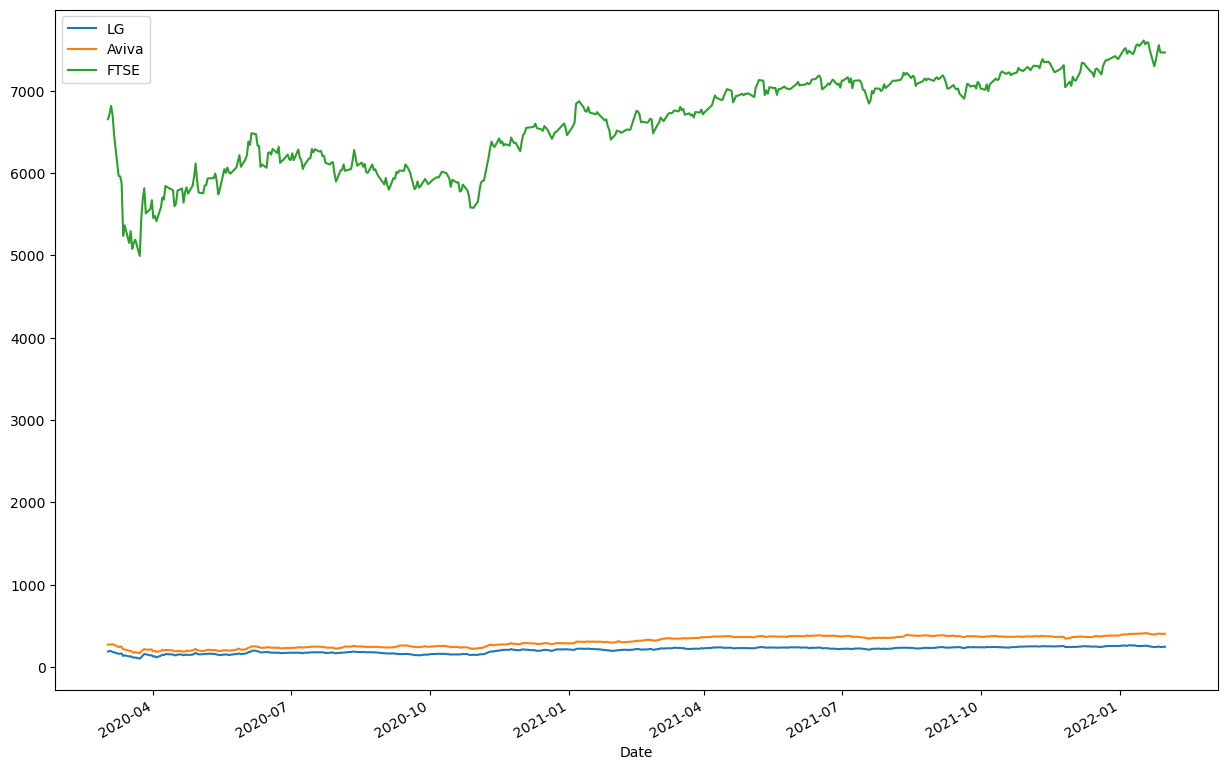

In [249]:
LGtr['Adj Close'].plot(figsize=(15,10), label='LG')
Avivatr['Adj Close'].plot(label='Aviva')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [250]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10

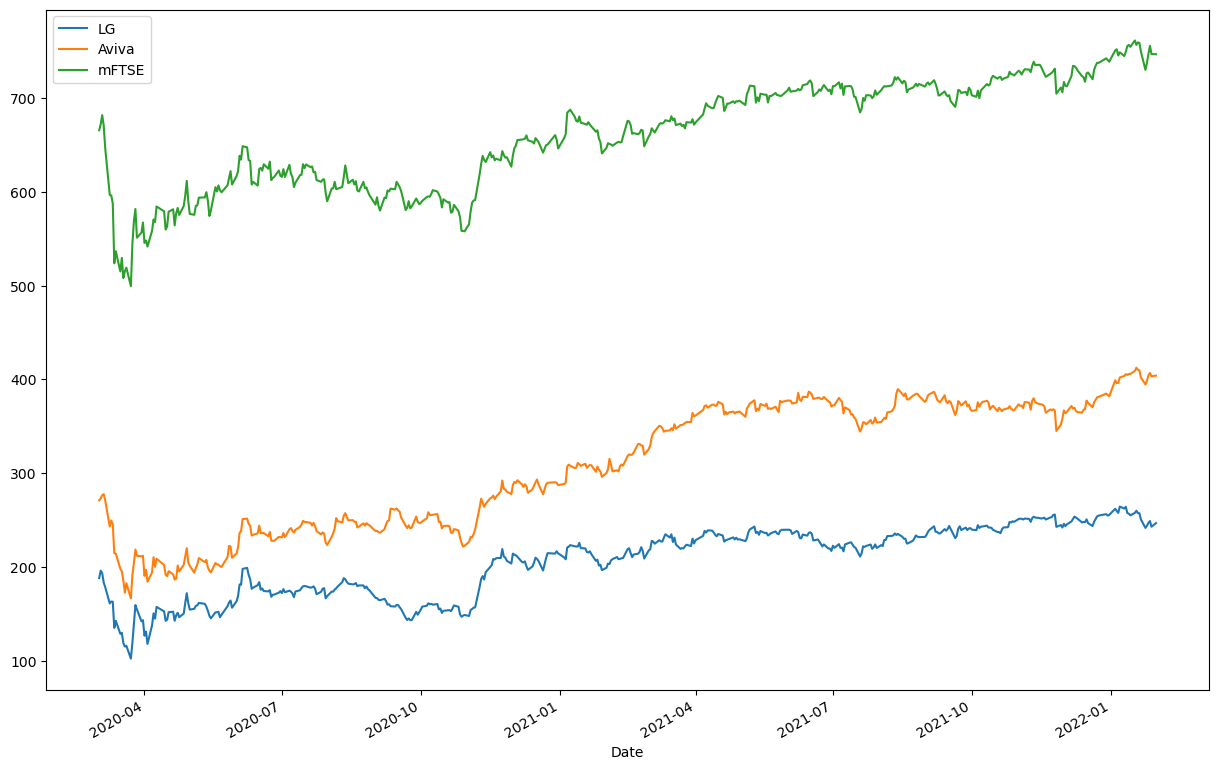

In [251]:
LGtr['Adj Close'].plot(figsize=(15,10), label='LG')
Avivatr['Adj Close'].plot(label='Aviva')
mFTSEtr['m Adj Close'].plot(label='mFTSE')
plt.legend()
plt.show()

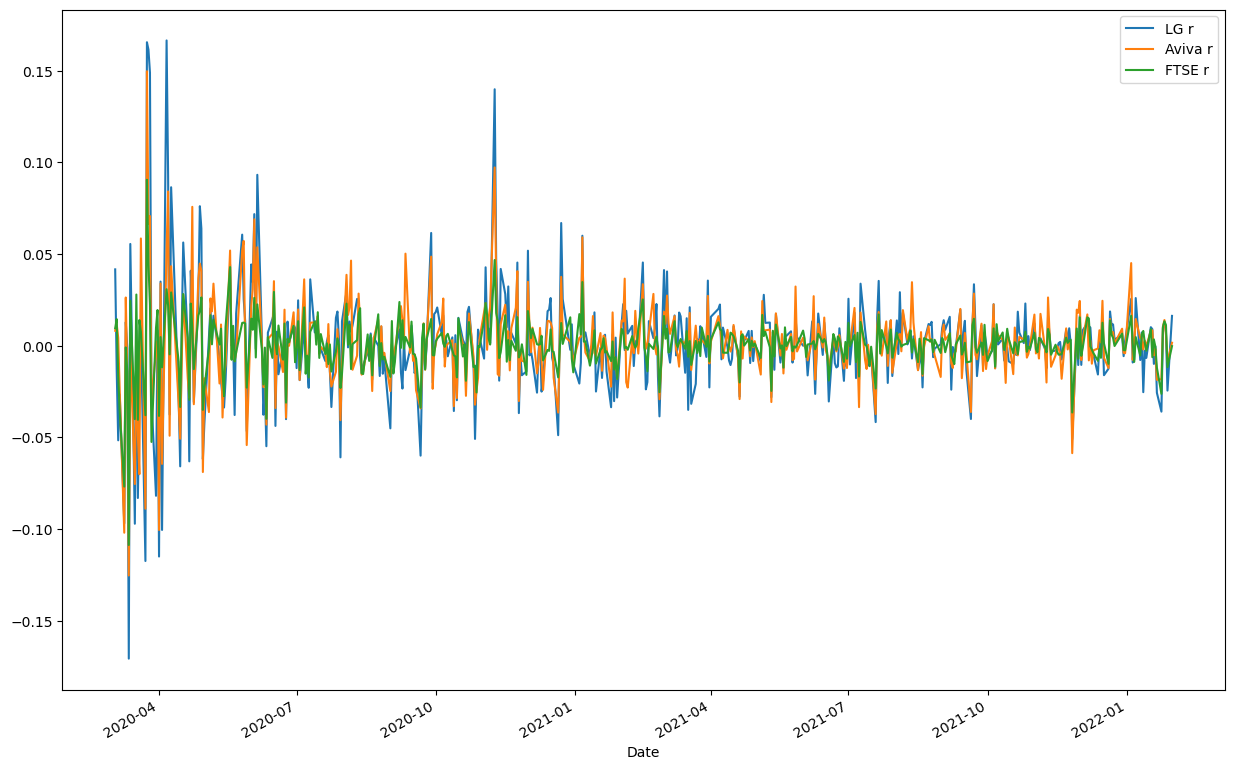

In [252]:
LGtr['Return'].plot(figsize=(15,10), label='LG r')
Avivatr['Return'].plot(label='Aviva r')
FTSEtr['Return'].plot(label='FTSE r')
plt.legend()
plt.show()

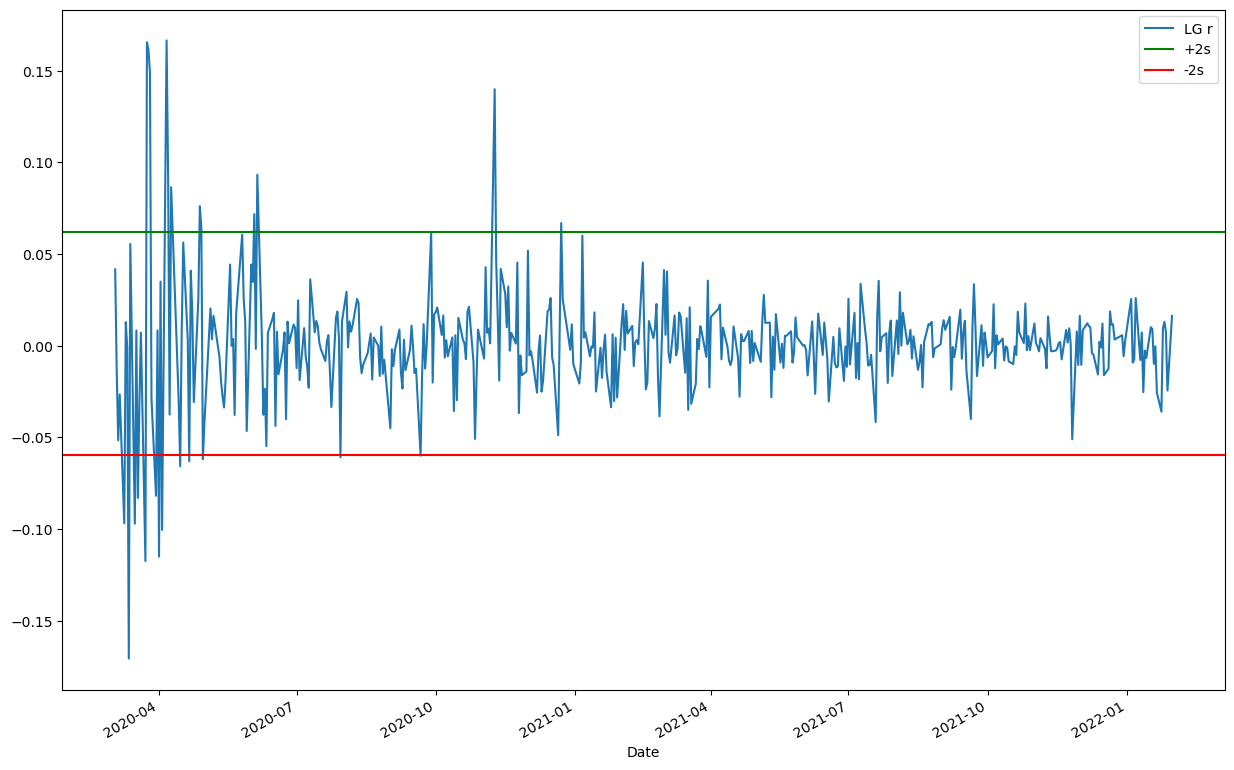

In [253]:
#Empirical Rules, Page 75 of Lecture 1
LGtr['Return'].plot(figsize=(15,10), label='LG r')
plt.axhline(y=LGtr['Return'].mean()+2*LGtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=LGtr['Return'].mean()-2*LGtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [254]:
#select rows by value 
pss=LGtr['Return'].mean()+2*LGtr['Return'].std()
LGtr.loc[LGtr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-24,119.619690,0.165584
2020-03-25,138.945404,0.161560
2020-03-26,159.641006,0.148948
2020-04-06,137.945831,0.166562
2020-04-07,150.829636,0.093398
2020-04-09,157.715851,0.086458
2020-04-28,161.983749,0.076115
2020-04-29,172.334915,0.063902
2020-06-03,181.658844,0.071795


In [255]:
nss=LGtr['Return'].mean()-2*LGtr['Return'].std()
LGtr.loc[LGtr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-09,161.418091,-0.096935
2020-03-12,135.391266,-0.170748
2020-03-16,129.023407,-0.097150
2020-03-18,119.286484,-0.083096
2020-03-23,102.626366,-0.117479
2020-03-30,142.351501,-0.081901
2020-04-01,127.024200,-0.115037
2020-04-03,118.249847,-0.100535
2020-04-15,142.906845,-0.065828


In [256]:
LGtr.loc[LGtr['Return']==LGtr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-12,135.391266,-0.170748


### Statistics

In [257]:
LGtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,205.945165,0.001019
std,36.925741,0.030457
min,102.626366,-0.170748
25%,174.053516,-0.010487
50%,217.757568,0.001365
75%,236.493454,0.011647
max,264.572296,0.166562


In [258]:
Avivatr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,309.067259,0.001108
std,67.022750,0.023747
min,166.718170,-0.125402
25%,244.372086,-0.007894
50%,319.037964,0.000503
75%,371.488892,0.010624
max,412.527618,0.149763


In [259]:
FTSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [260]:
# Return to risk
LGtr['Return'].mean()/LGtr['Return'].std()

0.03347265293879793

### Boxplot

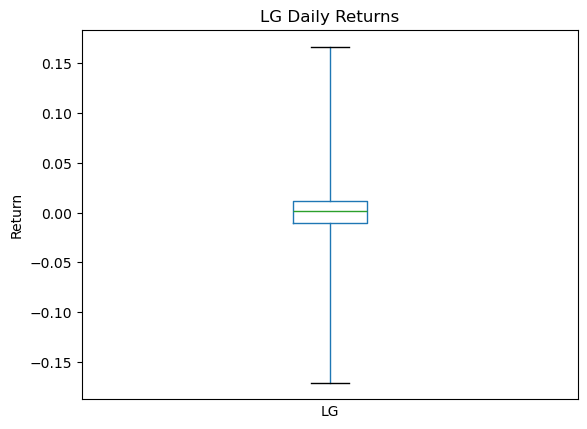

In [261]:
lgb=LGtr.boxplot(column='Return',whis=[0,100],grid=False)

lgb.set_title("LG Daily Returns",fontsize=12)
lgb.set_xlabel('LG', fontsize=10)
lgb.set_ylabel('Return', fontsize=10)
lgb.set_xticks([])
plt.show()

In [262]:
#Creturns=pd.concat([LGtr['Return'],Avivatr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['LG','Aviva','FTSE']

In [263]:
AllTrainingReturns=pd.DataFrame({'LG r':LGtr['Return'],'Aviva r':Avivatr['Return'],'FTSE r':FTSEtr['Return']})

In [264]:
AllTrainingReturns

,LG r,Aviva r,FTSE r
Date,,,
2020-03-02,NaN,NaN,NaN
2020-03-03,0.041650,0.008158,0.009512
2020-03-04,-0.013580,0.011850,0.014498
2020-03-05,-0.051625,0.004284,-0.016169
2020-03-06,-0.026613,-0.024460,-0.036210
...,...,...,...
2022-01-25,0.009595,0.010375,0.010182
2022-01-26,0.013024,0.014003,0.013335
2022-01-27,0.007297,0.006444,0.011312


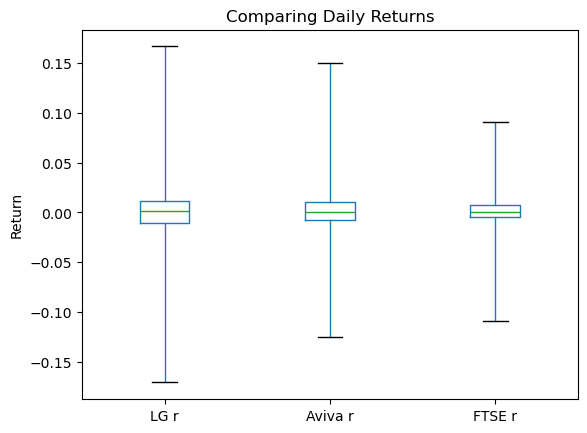

In [265]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

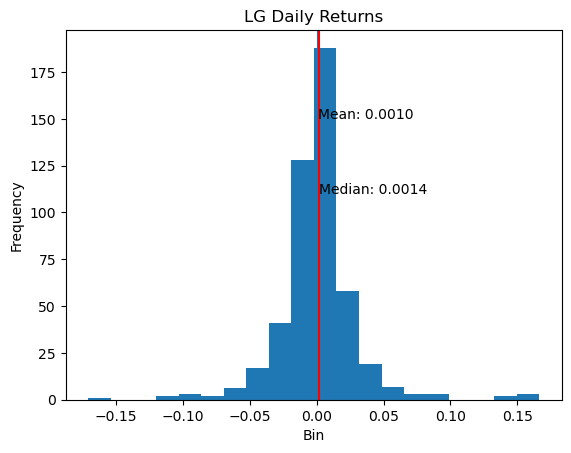

In [266]:
LGtr.hist(column='Return',bins=20,grid=False)

plt.title("LG Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(LGtr['Return'].mean())
plt.text(LGtr['Return'].mean()*1.1,150,'Mean: {:,.4f}'.format(LGtr['Return'].mean()))

plt.axvline(LGtr['Return'].median(),color='r')
plt.text(LGtr['Return'].median()*1.2,110,'Median: {:,.4f}'.format(LGtr['Return'].median()))

plt.show()

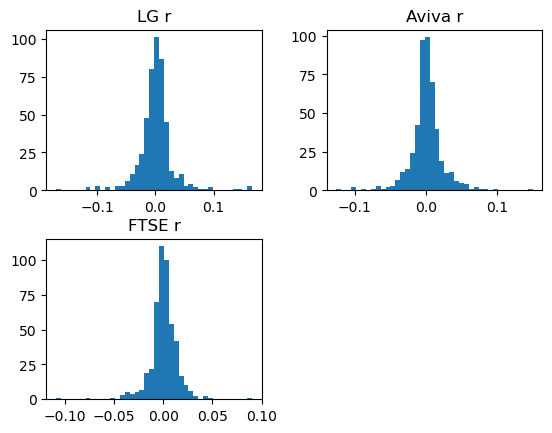

In [267]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,grid=False)
plt.show()

## Regression

In [268]:
# The three dataframes have the same column names, we should change the names and merge them together
LGtr.columns=['LG_Price','LG_Return']
Avivatr.columns=['Aviva_Price','Aviva_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([LGtr,Avivatr,FTSEtr],axis=1)

In [269]:
OverallTraining.head()

,LG_Price,LG_Return,Aviva_Price,Aviva_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,188.444519,NaN,271.173859,NaN,6654.899902,NaN
2020-03-03,196.293289,0.041650,273.386230,0.008158,6718.200195,0.009512
2020-03-04,193.627655,-0.013580,276.625763,0.011850,6815.600098,0.014498
2020-03-05,183.631592,-0.051625,277.810944,0.004284,6705.399902,-0.016169
2020-03-06,178.744614,-0.026613,271.015778,-0.024460,6462.600098,-0.036210


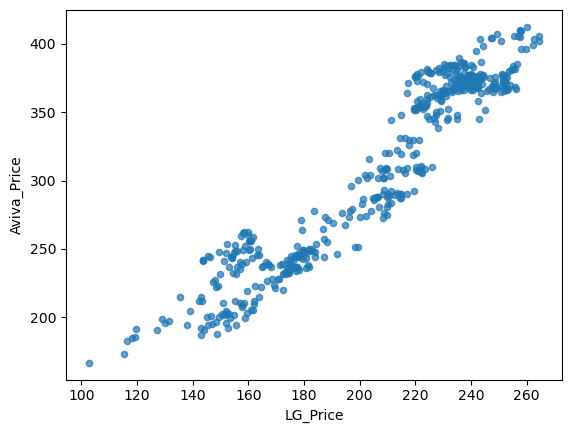

In [270]:
OverallTraining.plot.scatter(x='LG_Price',y='Aviva_Price',alpha=0.7)
plt.show()

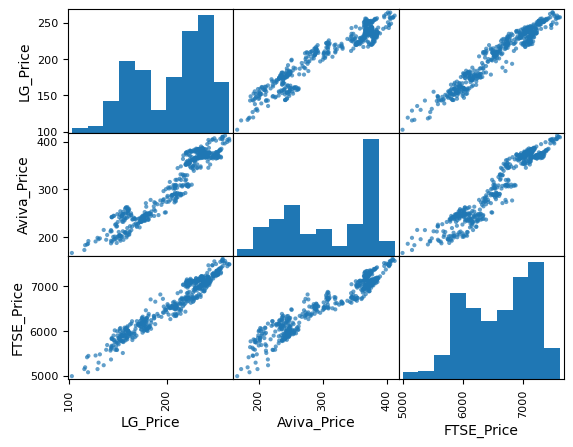

In [271]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7)
plt.show()

In [272]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,LG_Price,Aviva_Price,FTSE_Price
LG_Price,1.000000,0.953413,0.969973
Aviva_Price,0.953413,1.000000,0.957471
FTSE_Price,0.969973,0.957471,1.000000


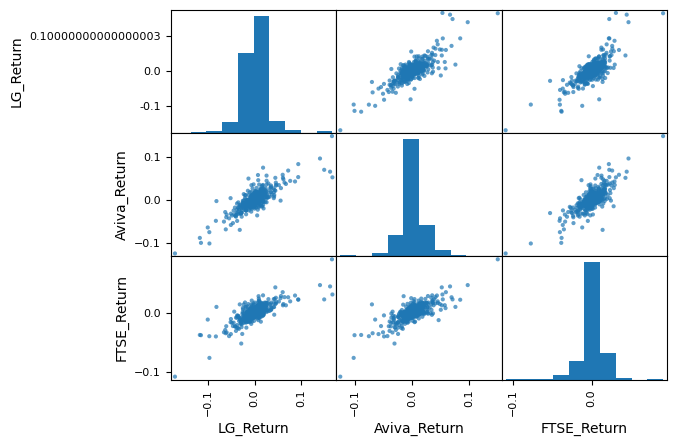

In [273]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7)
plt.show()

In [274]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,LG_Return,Aviva_Return,FTSE_Return
LG_Return,1.000000,0.827731,0.782872
Aviva_Return,0.827731,1.000000,0.786037
FTSE_Return,0.782872,0.786037,1.000000


In [275]:
LG_Aviva_reg=sfa.ols('LG_Price ~ Aviva_Price', data=OverallTraining).fit()

In [276]:
LG_Aviva_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LG_Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     4814.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          5.18e-253
Time:                        13:11:08   Log-Likelihood:                -1852.9
No. Observations:                 484   AIC:                             3710.
Df Residuals:                     482   BIC:                             3718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      43.5994      2.394     18.212      0.000      38.895      48.303
Aviva_Price     0.5253      0.008     69.387      0.000       0.510       0.540
==============================================================================
Omnibus:                       18.959   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.065
Skew:                          -0.343   Prob(JB):                     0.000535
Kurtosis:                       2.474   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

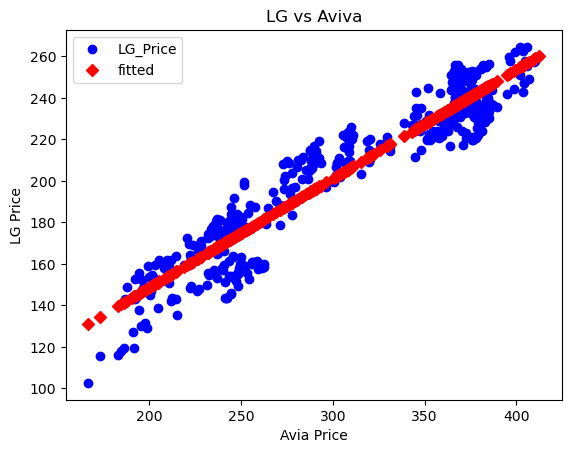

In [277]:
sa.graphics.plot_fit(LG_Aviva_reg,exog_idx='Aviva_Price',vlines=False)
plt.ylabel("LG Price")
plt.xlabel("Avia Price")
plt.title("LG vs Aviva")
plt.show()

In [278]:
LG_FTSE_rreg=sfa.ols('LG_Return ~ FTSE_Return', data=OverallTraining).fit()

In [279]:
LG_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LG_Return   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     761.5
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          3.48e-101
Time:                        13:11:15   Log-Likelihood:                 1230.7
No. Observations:                 483   AIC:                            -2457.
Df Residuals:                     481   BIC:                            -2449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0005      0.001      0.522      0.602      -0.001       0.002
FTSE_Return     1.6704      0.061     27.596      0.000       1.551       1.789
==============================================================================
Omnibus:                      109.994   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.701
Skew:                           0.604   Prob(JB):                    8.81e-281
Kurtosis:                      10.914   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

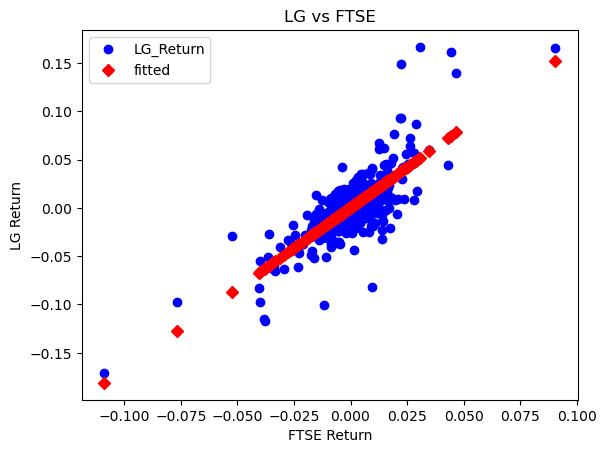

In [280]:
sa.graphics.plot_fit(LG_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("LG Return")
plt.xlabel("FTSE Return")
plt.title("LG vs FTSE")
plt.show()

In [281]:
# Multiple Regression
LG_Aviva_FTSE_reg=sfa.ols('LG_Price ~ Aviva_Price + FTSE_Price', data=OverallTraining).fit()

In [282]:
LG_Aviva_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LG_Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4400.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          7.12e-310
Time:                        13:11:24   Log-Likelihood:                -1716.7
No. Observations:                 484   AIC:                             3439.
Df Residuals:                     481   BIC:                             3452.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -136.9377      9.639    -14.206      0.000    -155.878    -117.997
Aviva_Price     0.1634      0.020      8.244      0.000       0.124       0.202
FTSE_Price      0.0443      0.002     19.068      0.000       0.040       0.049
==============================================================================
Omnibus:                        4.397   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.251
Skew:                          -0.187   Prob(JB):                        0.119
Kurtosis:                       2.734   Cond. No.                     1.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Time Series

In [283]:
LGte.columns=['LG_Price','LG_Return']
Avivate.columns=['Aviva_Price','Aviva_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [284]:
ma5=LGtr.rolling(5).mean()

In [285]:
ma20=LGtr.rolling(20).mean()

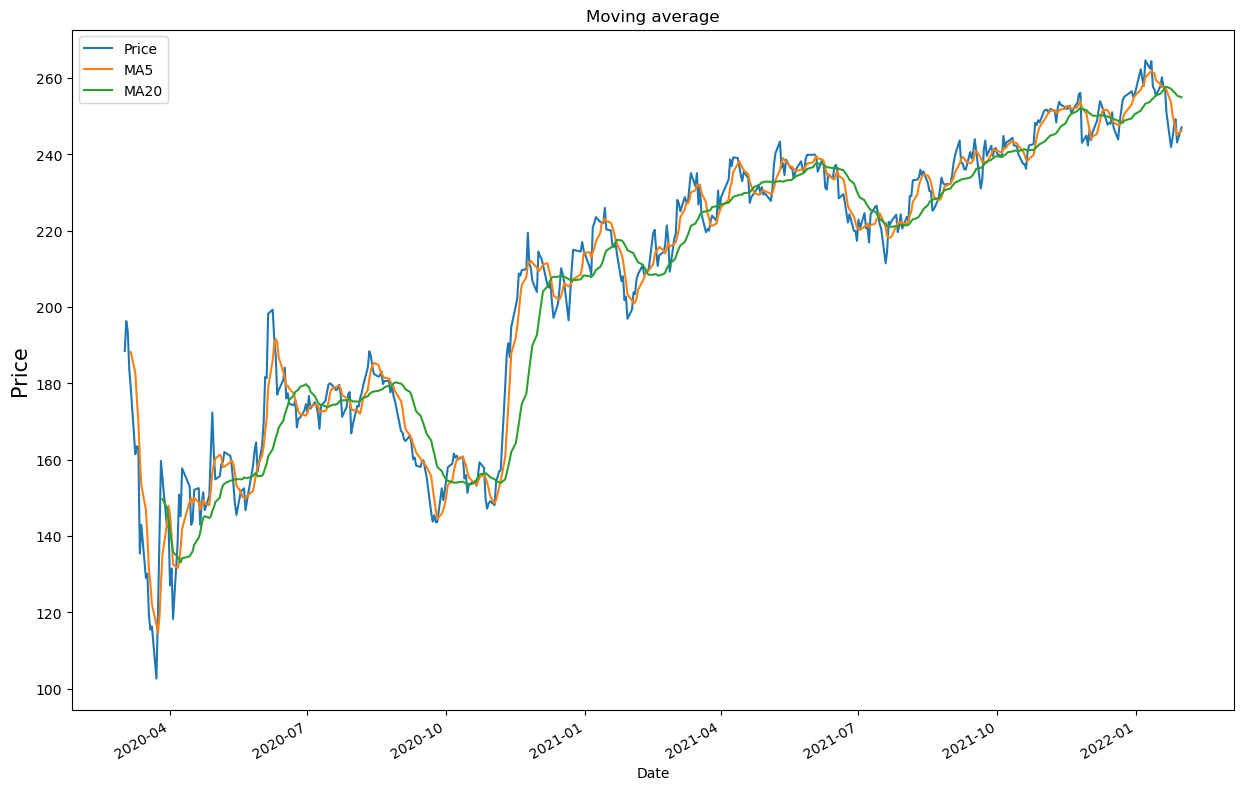

In [286]:
LGtr['LG_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['LG_Price'].plot(label='MA5')
ma20['LG_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [287]:
#creat forecasts
LGma5fcsts=pd.Series([ma5['LG_Price'][-1]]*20)
LGma5fcsts.index=LGte.index

C:\Users\U2291532\AppData\Local\Temp\ipykernel_12340\408017956.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  LGma5fcsts=pd.Series([ma5['LG_Price'][-1]]*20)


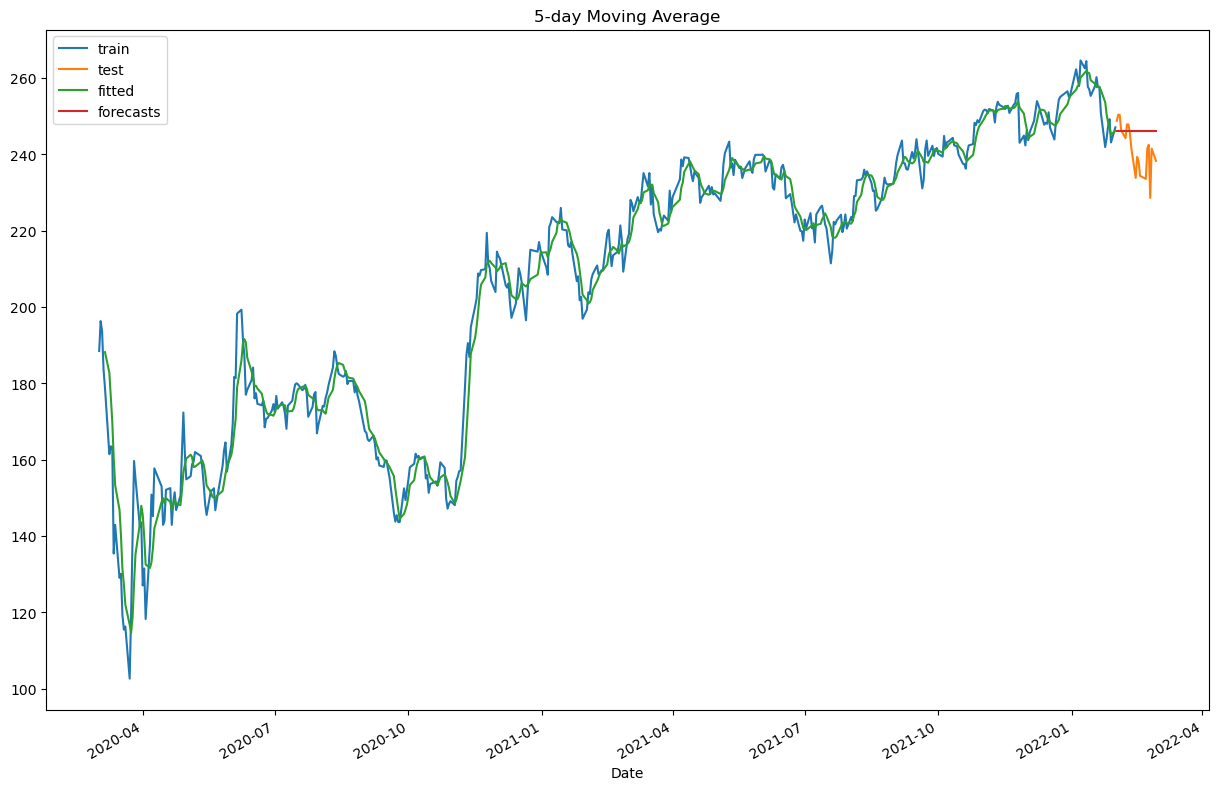

In [288]:
LGtr['LG_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
LGte['LG_Price'].plot(label='test')
ma5['LG_Price'].plot(label='fitted')
LGma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [289]:
MAE(LGte['LG_Price'],LGma5fcsts)

6.188820190429692

In [290]:
MSE(LGte['LG_Price'],LGma5fcsts)

60.59676812976609

In [291]:
print(
    'MAE: {:,.4f}'.format(MAE(LGte['LG_Price'],LGma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(LGte['LG_Price'],LGma5fcsts))
                         )

MAE: 6.1888 
MSE: 60.5968


### Single Exponential Smoothing

In [292]:
LGses=SES(LGtr['LG_Price'],initialization_method="estimated").fit()

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [293]:
LGsesfcsts=LGses.forecast(20)
LGsesfcsts.index=LGte.index

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


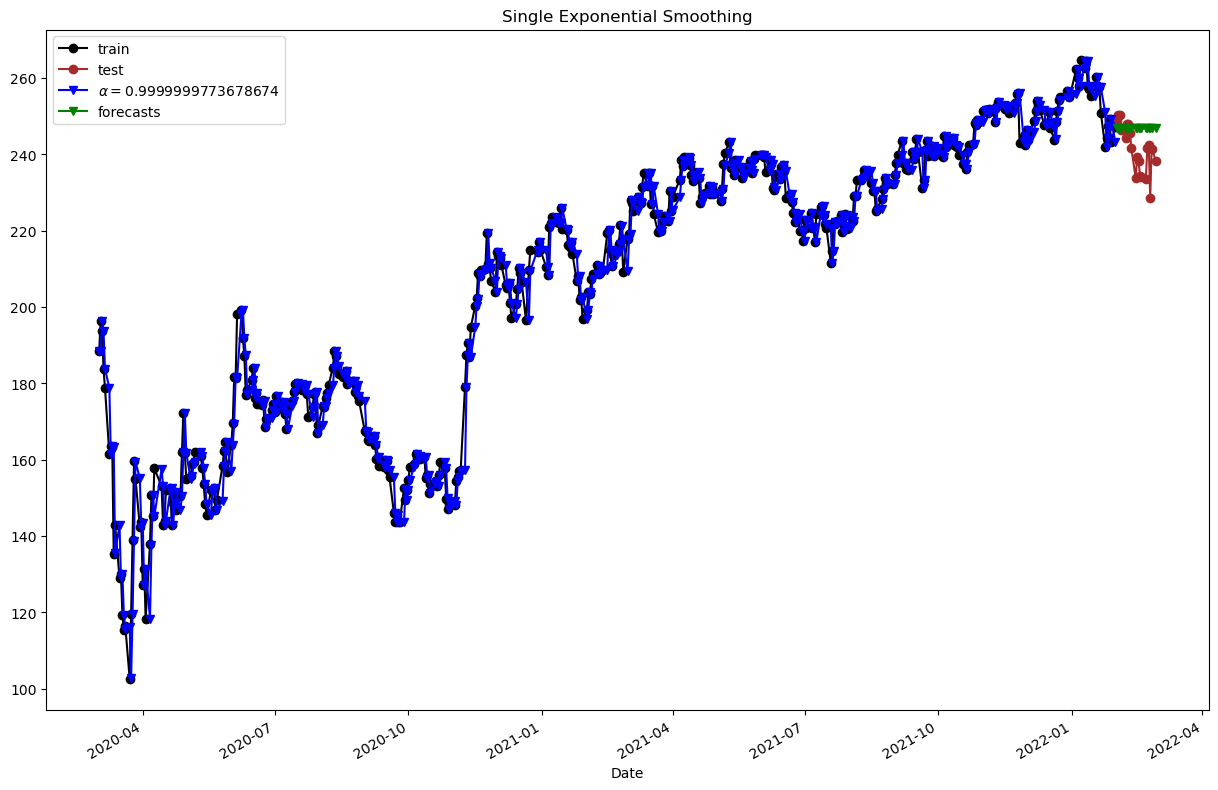

In [294]:
LGtr['LG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
LGte['LG_Price'].plot(marker='o',color='brown',label='test')
LGses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%JDses.model.params['smoothing_level'])
LGsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [296]:
print(
    'MAE: {:,.4f}'.format(MAE(LGte['LG_Price'],LGsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(LGte['LG_Price'],LGsesfcsts))
)

MAE: 6.5918 
MSE: 69.1136


### Double Exponential Smoothing

In [297]:
LGdes=DES(LGtr['LG_Price'],initialization_method="estimated").fit()

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [298]:
LGdesfcsts=LGdes.forecast(20)
LGdesfcsts.index=LGte.index

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


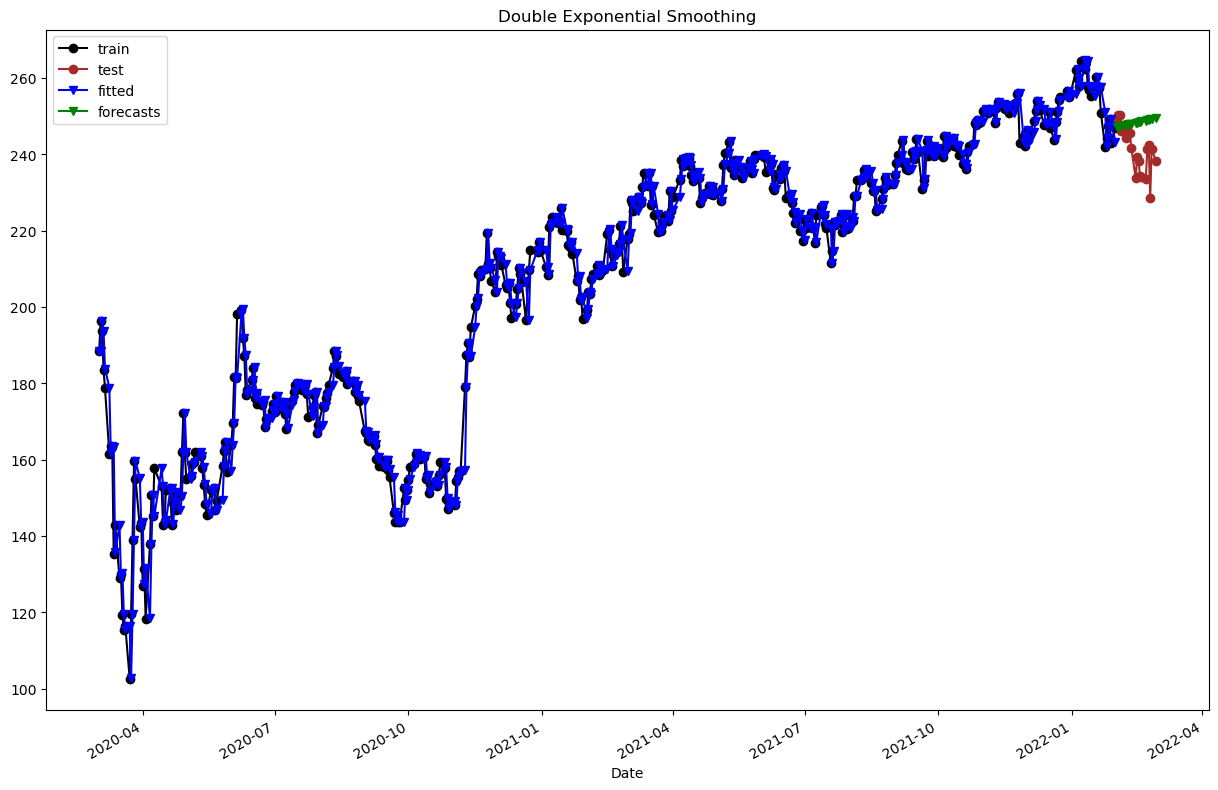

In [299]:
LGtr['LG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
LGte['LG_Price'].plot(marker='o',color='brown',label='test')
LGdes.fittedvalues.plot(marker='v', color='blue',label='fitted')
LGdesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [300]:
print(
    'MAE: {:,.4f}'.format(MAE(LGte['LG_Price'],LGdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(LGte['LG_Price'],LGdesfcsts))
)

MAE: 7.6365 
MSE: 91.7140


### Holt's Winters (Additive)

In [301]:
LGtesa=TES(LGtr['LG_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
LGtesfcstsa=LGtesa.forecast(20)
LGtesfcstsa.index=LGte.index

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


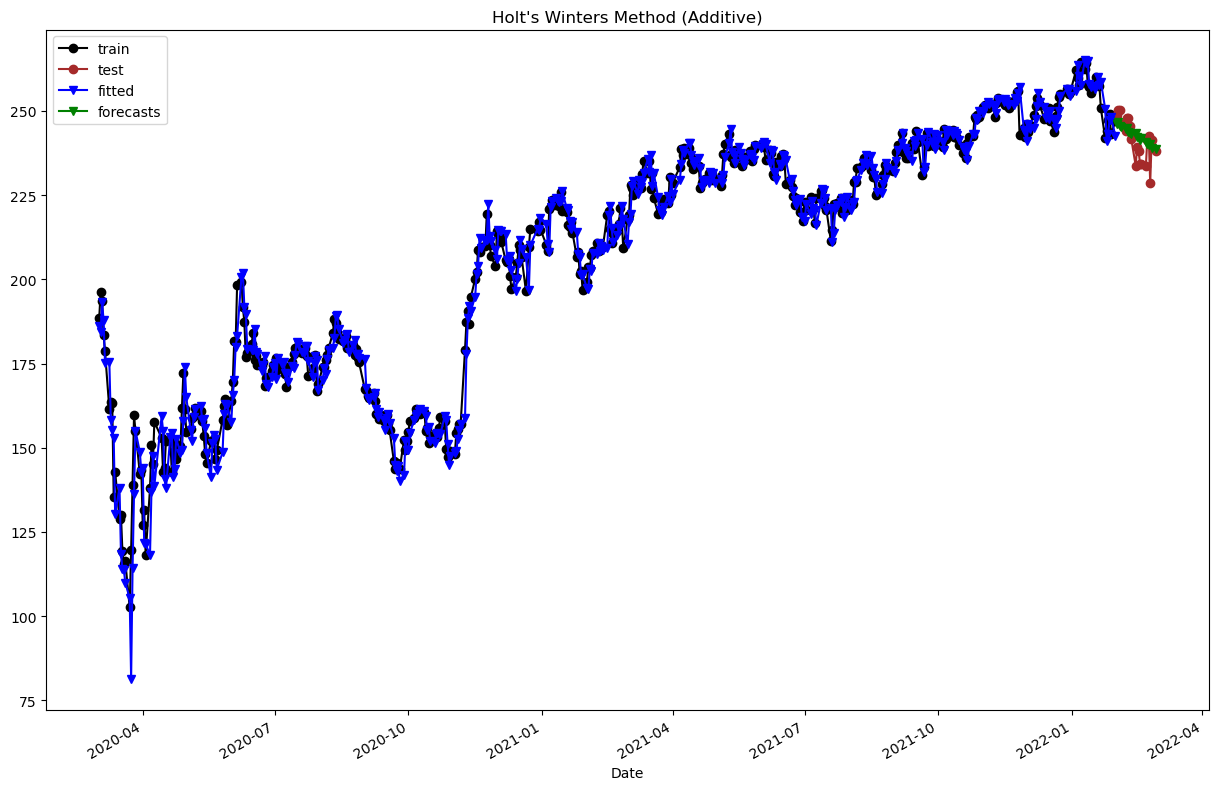

In [302]:
LGtr['LG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
LGte['LG_Price'].plot(marker='o',color='brown',label='test')
LGtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
LGtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [303]:
print(
    'MAE: {:,.4f}'.format(MAE(LGte['LG_Price'],LGtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(LGte['LG_Price'],LGtesfcstsa))
)

MAE: 3.9829 
MSE: 25.2361


### Holt's Winters (Multiplicative)

In [304]:
LGtesm=TES(LGtr['LG_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
LGtesfcstsm=LGtesm.forecast(20)
LGtesfcstsm.index=JDte.index

C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\U2291532\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


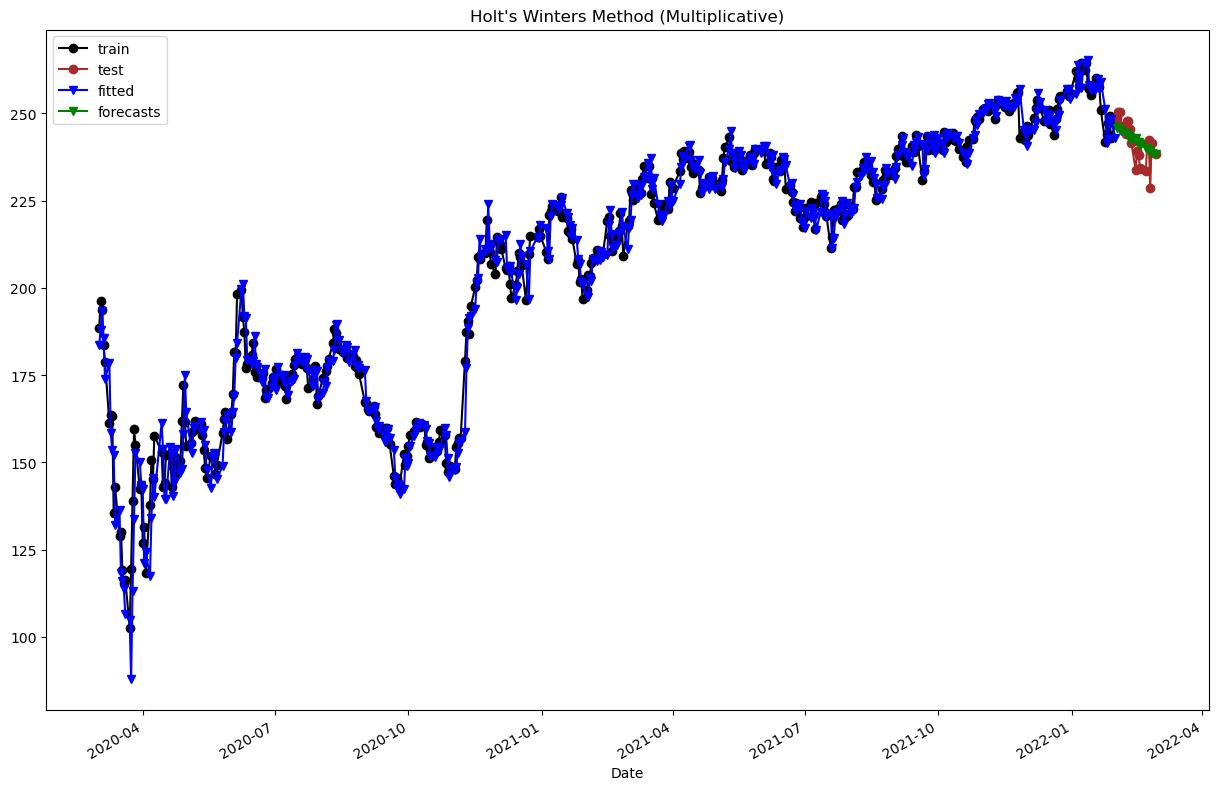

In [305]:
LGtr['LG_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
LGte['LG_Price'].plot(marker='o',color='brown',label='test')
LGtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
LGtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [307]:
print(
    'MAE: {:,.4f}'.format(MAE(LGte['LG_Price'],LGtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(LGte['LG_Price'],LGtesfcstsm))
)

MAE: 3.9360 
MSE: 23.5808
